We start by installing necessary libraries

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
#for visualization
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns 

Then we import and read the dataset

In [30]:
obesity= pd.read_csv('Ob-data.csv')
obesity.head(6)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,NaN,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,NaN,NaN,no,0.0,0.0,Sometimes,Automobile,Normal_Weight


We then check for missing values

In [31]:
obesity.isnull().sum()

Gender                             0
Age                               12
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               0
SMOKE                             35
CH2O                              16
SCC                               65
FAF                                0
TUE                                0
CALC                               0
MTRANS                             0
NObeyesdad                         0
dtype: int64

We also check for datatypes

In [32]:
obesity.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

We check to see if the data is skewed or normal 

<Figure size 640x480 with 0 Axes>

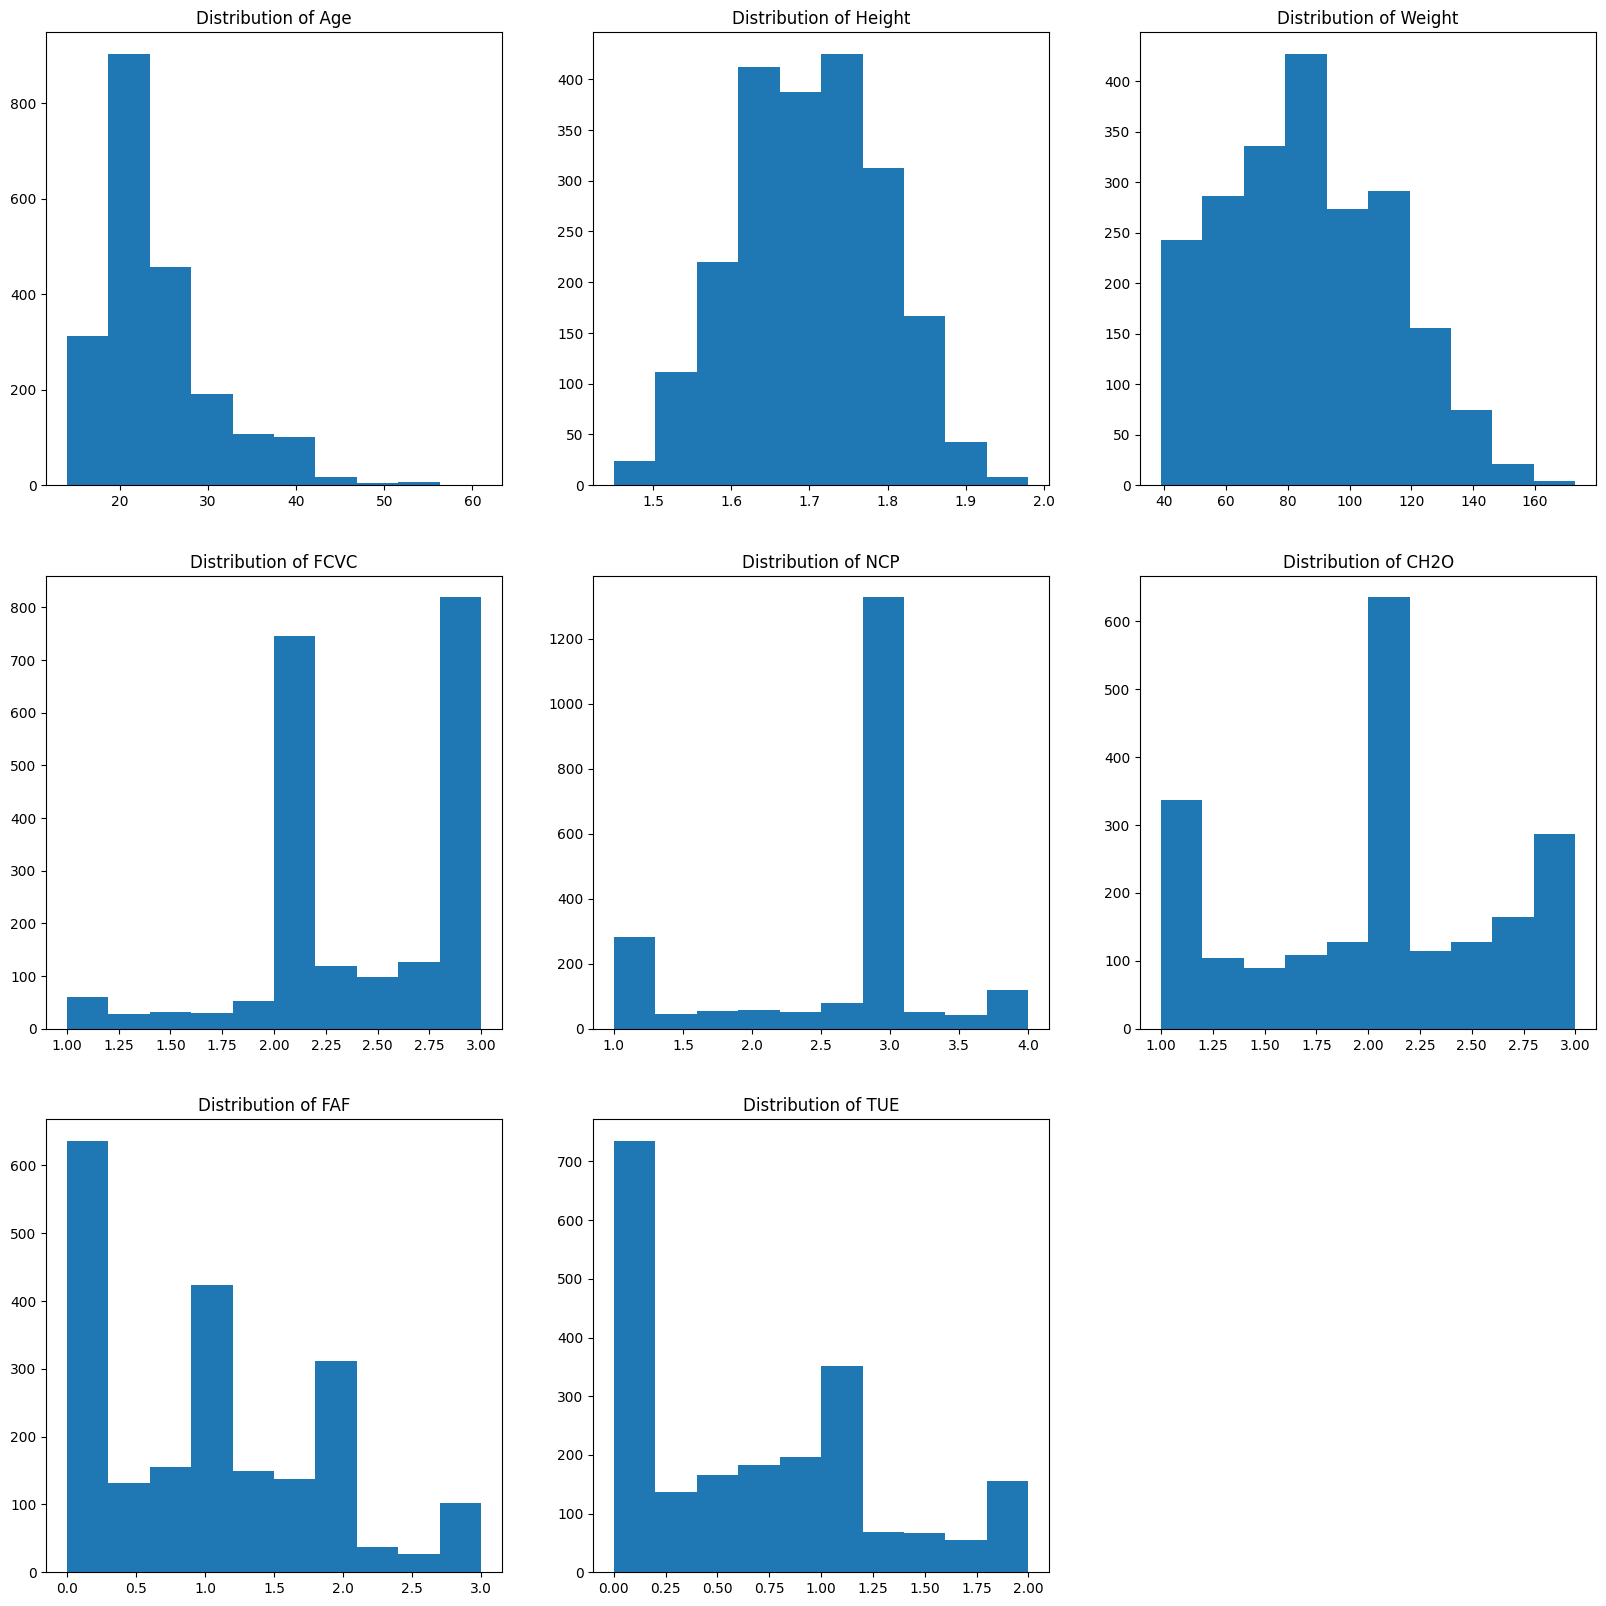

In [33]:
cont_data=obesity.select_dtypes(exclude='object')

def plothisto(cont_data):
    plt.figure(figsize=(20,20))
    for i, col in enumerate(cont_data.columns):
        plt.subplot(3,3,i+1)
        plt.hist(obesity[col])
        plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

plothisto(cont_data)

We fill in the columns (with continuous data) that are skewed with the median in that column

In [34]:
obesity["Age"]=obesity["Age"].fillna(obesity["Age"].median())

obesity["CH2O"]=obesity["CH2O"].fillna(obesity["CH2O"].median())

We fill in the columns (with categorical data) with the mode

In [35]:
obesity["SCC"]=obesity["SCC"].fillna(obesity["SCC"].mode()[0])

obesity["SMOKE"]=obesity["SMOKE"].fillna(obesity["SMOKE"].mode()[0])

We then check to confirm that there are no missing values

In [36]:
obesity.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

After, we give age the correct datatype

In [37]:
obesity["Age"]=obesity["Age"].astype('int')

We check that all columns now have the right datatypes

In [38]:
obesity.dtypes

Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

We convert the data from the nobeyesdad column and create a new one to 0 or 1 since we shall be using logistic regression

In [39]:
obesity['Obese_Binary'] = obesity['NObeyesdad'].apply(lambda x: 0 if x == "Normal_Weight" else 1)

Then we drop the nobeyesdad column

In [40]:
obesity = obesity.drop(columns=['NObeyesdad'])

We check that the changes have been made

In [41]:
obesity.head(15)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obese_Binary
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,0
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,0
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,0
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,1
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,1
5,Male,29,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,0
6,Female,23,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,0
7,Male,22,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,0
8,Male,24,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,0
9,Male,22,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,0


We use labelencoder to encode the columns with categorical data

In [42]:
labelencoder=LabelEncoder()

obesity['Gender']=labelencoder.fit_transform(obesity['Gender'])
obesity['family_history_with_overweight']=labelencoder.fit_transform(obesity['family_history_with_overweight'])
obesity['CAEC']=labelencoder.fit_transform(obesity['CAEC'])
obesity['CALC']=labelencoder.fit_transform(obesity['CALC'])
obesity['MTRANS']=labelencoder.fit_transform(obesity['MTRANS'])
obesity['SCC']=labelencoder.fit_transform(obesity['SCC'])
obesity['SMOKE']=labelencoder.fit_transform(obesity['SMOKE'])
obesity['FAVC']=labelencoder.fit_transform(obesity['FAVC'])

Check for changes

In [43]:
obesity.head(10)
obesity.dtypes

Gender                              int64
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
Obese_Binary                        int64
dtype: object

We check for correlation between columns

In [44]:
corr_matrix=obesity.corr()
corr_matrix

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obese_Binary
Gender,1.000000,0.050213,0.618466,0.161668,0.102512,0.064934,-0.274505,0.067600,0.091543,0.044698,0.107491,-0.102633,0.189607,0.017269,0.007616,-0.137537,-0.002213
Age,0.050213,1.000000,-0.032491,0.188063,0.198780,0.054962,0.013091,-0.047387,0.072418,0.098128,-0.050849,-0.112262,-0.146777,-0.300945,-0.038946,-0.598853,0.138148
Height,0.618466,-0.032491,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,0.048818,0.055499,0.213872,-0.133753,0.294709,0.051912,-0.129732,-0.073609,0.106700
Weight,0.161668,0.188063,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,0.287493,0.025746,0.199659,-0.201906,-0.051436,-0.071561,-0.206677,0.004610,0.370099
family_history_with_overweight,0.102512,0.198780,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,0.169787,0.017385,0.142246,-0.185422,-0.056673,0.022943,0.036676,-0.101540,0.285109
FAVC,0.064934,0.054962,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,0.150068,-0.050660,0.010030,-0.190658,-0.107995,0.068417,-0.089520,-0.069800,0.197164
FCVC,-0.274505,0.013091,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,-0.054670,0.014320,0.068070,0.071852,0.019939,-0.101135,-0.060781,0.064743,0.062828
NCP,0.067600,-0.047387,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,-0.097801,0.007811,0.054589,-0.015624,0.129504,0.036326,-0.071747,-0.053858,-0.027052
CAEC,0.091543,0.072418,0.048818,0.287493,0.169787,0.150068,-0.054670,-0.097801,1.000000,-0.055282,0.145695,-0.109179,-0.030110,-0.048567,-0.047540,-0.048535,0.302788
SMOKE,0.044698,0.098128,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,-0.055282,1.000000,-0.032209,0.047731,0.011216,0.017613,-0.082471,-0.010702,-0.067897


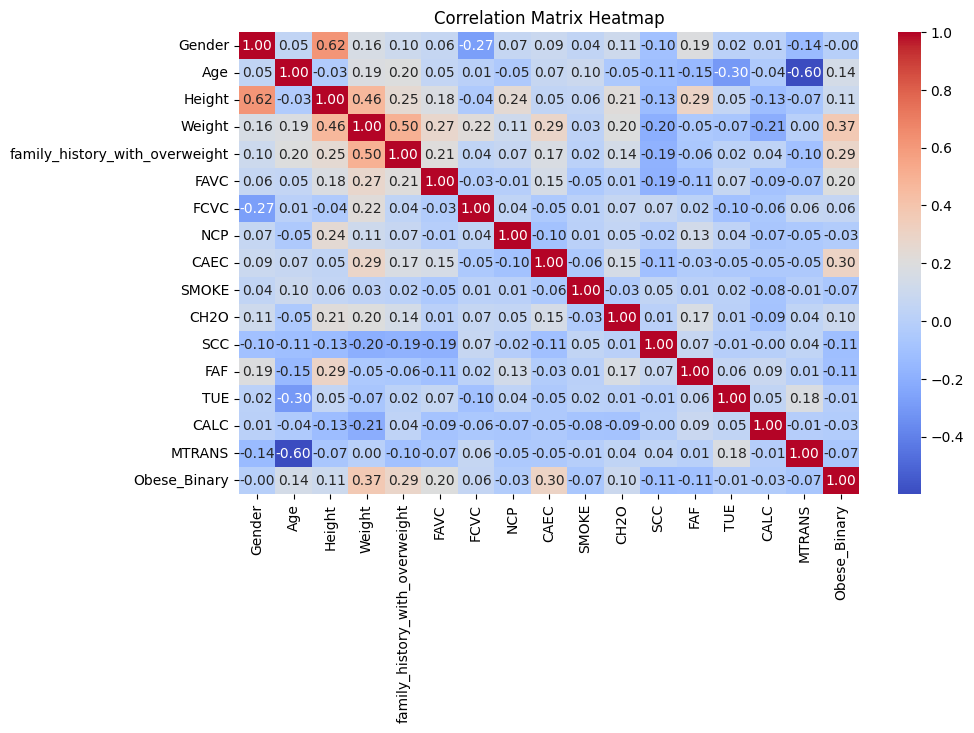

In [45]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

we create the different variables, X for the columns that will be used for depicting, and y for the column that shows whether a student is obese or not.

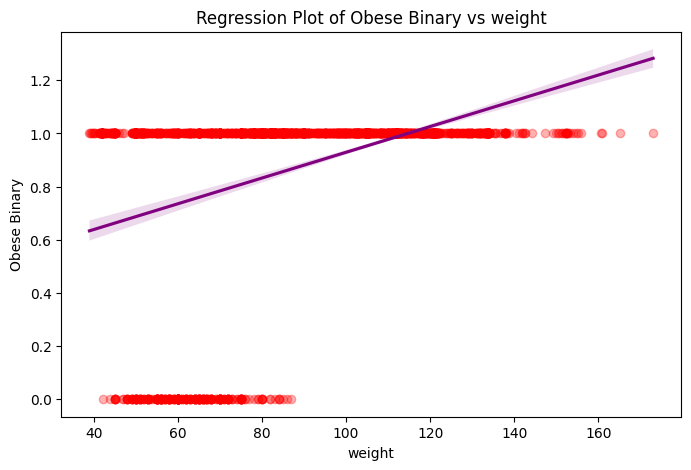

In [54]:
plt.figure(figsize=(8, 5))
sns.regplot(x="Weight", y="Obese_Binary",color='red', data=obesity, scatter_kws={'alpha':0.3}, line_kws={"color": "purple"})
plt.title("Regression Plot of Obese Binary vs weight")
plt.xlabel("weight")
plt.ylabel("Obese Binary")
plt.show()

In [46]:
X = obesity[['Age','Height','Weight','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE', 'CH2O', 'SCC','FAF', 'TUE', 'CALC', 'MTRANS']] #predictor
y = obesity['Obese_Binary']

We then split the data into training and testing sets

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

We then fit the model

In [48]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

this shows what the model predicts... It is fed with the x_test set

In [49]:
y_pred = model.predict(X_test)

In [50]:
accuracy=accuracy_score(y_test, y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)

print("Accuracy: ", accuracy*100)
print("Confusion Matrix: ",conf_matrix)
print("Classification Report: ", class_report)

Accuracy:  83.92434988179669
Confusion Matrix:  [[  8  54]
 [ 14 347]]
Classification Report:                precision    recall  f1-score   support

           0       0.36      0.13      0.19        62
           1       0.87      0.96      0.91       361

    accuracy                           0.84       423
   macro avg       0.61      0.55      0.55       423
weighted avg       0.79      0.84      0.81       423



We then try to improve the accuracy of the model

In [51]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization methods
    'C': [0.01, 0.1, 1, 10, 100],                 # Inverse regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],      # Optimization algorithms
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,           # 5-fold cross-validation
    verbose=1,       # Print progress
    n_jobs=-1        # Use all available cores
)

We fit the model after using gridsearchcv method and test it to see if the accuracy increases

In [52]:
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the tuned model on the test set
best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
print("Confusion Matrix: ",conf_matrix)
print("New Accuracy:", accuracy_score(y_test, y_pred2))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8667058802872545

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.85      1.00      0.92       361

    accuracy                           0.85       423
   macro avg       0.43      0.50      0.46       423
weighted avg       0.73      0.85      0.79       423

Confusion Matrix:  [[  8  54]
 [ 14 347]]
New Accuracy: 0.8534278959810875
